In [76]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import math
import random

In [126]:
pip install opencv-python

     |████████████████████████████████| 40.3 MB 329 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [127]:
import cv2

In [78]:
import albumentations # Image augmentation
import cv2 # OpenCV for easy image handling
import timm # Pretrained models

ModuleNotFoundError: No module named 'albumentations'

In [ ]:
train_data = pd.read_csv(r'./shopee-product-matching/train.csv', sep =',')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-117-b083c57ab54c>", line 1, in <module>
    train_data = pd.read_csv(r'./shopee-product-matching/train.csv', sep =',')
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 676, in parser_f
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 448, in _read
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 880, in __init__
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1114, in _make_engine
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1891, in __init__
  File "pandas/_libs/parsers.pyx", line 374, in pandas._libs.parsers.TextReader.__cinit__
  File "pandas/_libs/parsers.pyx", line 677, in pandas._libs.parsers.TextReader._setup_

In [4]:
train_data

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [21]:
# Posting_id is a primary key
train_data['posting_id'].duplicated().sum()

0

In [22]:
# Titles can be the same
train_data['title'].duplicated().sum()

1133

In [128]:
#Images dataframe
image_f = train_data['image']
images = [r'./shopee-product-matching/train_images/' + image for image in image_f]
for i in range(1000):
    images[i] = cv2.imread(images[i])

In [122]:
type(images[0])

PIL.JpegImagePlugin.JpegImageFile

In [125]:
transforms.ToTensor()(images[0])

AttributeError: 'NoneType' object has no attribute 'seek'

TypeError: Image data of dtype object cannot be converted to float

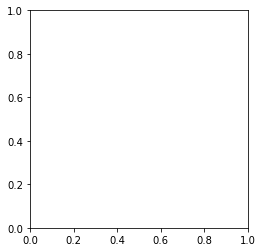

In [121]:
plt.imshow(images[1])

In [69]:
images_tensor = [transforms.ToTensor()(img) for img in images]

In [72]:
len(images_tensor)

10

In [96]:
# Normalizing data
A = transforms.Resize((512,512))(images_tensor[0])
imA = transforms.ToPILImage()(A)

In [ ]:
#defining random model for benchmark
# We suppose model is normalized and is in (3,n,n) format
class RandNet(nn.Module):
    def __init__(self):
        super(RandNet, self).__init__()
    
    def forward(self,X):
        n = X.size()[-1]
        return 
        
    

In [ ]:
class ShopeeNet(nn.Module):

    def __init__(self,
                 n_classes,
                 model_name='efficientnet_b0',
                 use_fc=False,
                 fc_dim=512,
                 dropout=0.0,
                 loss_module='softmax',
                 s=30.0,
                 margin=0.50,
                 ls_eps=0.0,
                 theta_zero=0.785,
                 pretrained=True):
        """
        :param n_classes:
        :param model_name: name of model from pretrainedmodels
            e.g. resnet50, resnext101_32x4d, pnasnet5large
        :param pooling: One of ('SPoC', 'MAC', 'RMAC', 'GeM', 'Rpool', 'Flatten', 'CompactBilinearPooling')
        :param loss_module: One of ('arcface', 'cosface', 'softmax')
        """
        super(ShopeeNet, self).__init__()
        print('Building Model Backbone for {} model'.format(model_name))

        self.backbone = timm.create_model(model_name, pretrained=pretrained)
        final_in_features = self.backbone.classifier.in_features
        
        self.backbone.classifier = nn.Identity()
        self.backbone.global_pool = nn.Identity()
        
        self.pooling =  nn.AdaptiveAvgPool2d(1)
            
        self.use_fc = use_fc
        if use_fc:
            self.dropout = nn.Dropout(p=dropout)
            self.fc = nn.Linear(final_in_features, fc_dim)
            self.bn = nn.BatchNorm1d(fc_dim)
            self._init_params()
            final_in_features = fc_dim

        self.loss_module = loss_module
        if loss_module == 'arcface':
            self.final = ArcMarginProduct(final_in_features, n_classes,
                                          s=s, m=margin, easy_margin=False, ls_eps=ls_eps)
        elif loss_module == 'cosface':
            self.final = AddMarginProduct(final_in_features, n_classes, s=s, m=margin)
        elif loss_module == 'adacos':
            self.final = AdaCos(final_in_features, n_classes, m=margin, theta_zero=theta_zero)
        else:
            self.final = nn.Linear(final_in_features, n_classes)

    def _init_params(self):
        nn.init.xavier_normal_(self.fc.weight)
        nn.init.constant_(self.fc.bias, 0)
        nn.init.constant_(self.bn.weight, 1)
        nn.init.constant_(self.bn.bias, 0)

    def forward(self, x, label):
        feature = self.extract_feat(x)
        if self.loss_module in ('arcface', 'cosface', 'adacos'):
            logits = self.final(feature, label)
        else:
            logits = self.final(feature)
        return logits

    def extract_feat(self, x):
        batch_size = x.shape[0]
        x = self.backbone(x)
        x = self.pooling(x).view(batch_size, -1)

        if self.use_fc:
            x = self.dropout(x)
            x = self.fc(x)
            x = self.bn(x)

        return x